<a href="https://colab.research.google.com/github/UmarFaruqManek/Tugas-Machine-Learning/blob/main/tugas_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [108]:
# mengambil dataset
data = pd.read_csv('/content/data9.csv')

# mendapatkan info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wilayah   50 non-null     object 
 1   2022(X)   50 non-null     float64
 2   Kategori  50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [109]:
# Menampilkan dimensi dataset
data.shape

(50, 3)

In [110]:
# Menampilkan dataset

data.head(10)

,wilayah,2022(X),Kategori
0,ACEH,14.64,Tinggi
1,Kota Padangsidimpuan,6.89,Sedang
2,Kota Denpasar,2.97,Rendah
3,Gianyar,4.70,Tinggi
4,Kota Serang,5.94,Sedang
5,Badung,2.53,Rendah
6,Sampang,21.61,Tinggi
7,Sidoarjo,5.36,Sedang
8,Bangka Barat,2.46,Rendah
9,Kuantan Singingi,8.24,Tinggi


In [111]:
#  membersihkan dataset

# Menghapus baris terakhir (jika kosong)
data = data.iloc[:-1, :]

# Menghapus data duplikat
data.drop_duplicates(inplace=True)

# Menghapus nilai null (jika ada)
data.dropna(inplace=True)

<ipython-input-111-b360df473195>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)
<ipython-input-111-b360df473195>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [112]:
# Mengganti label dalam kategori
data['Kategori'].replace({'Tinggi': 3, 'Sedang': 2 , 'Rendah': 1}, inplace=True);

In [113]:
data.head()

,wilayah,2022(X),Kategori
0,ACEH,14.64,3
1,Kota Padangsidimpuan,6.89,2
2,Kota Denpasar,2.97,1
3,Gianyar,4.70,3
4,Kota Serang,5.94,2


In [114]:
# Membuat variable untuk atribut dan label
X = data['wilayah'] #atribut
Y = data['Kategori'] #Label

In [115]:
# menampilkan atribut
X.head()

0                    ACEH
1    Kota Padangsidimpuan
2           Kota Denpasar
3                 Gianyar
4             Kota Serang
Name: wilayah, dtype: object

In [116]:
# menampilkan label
Y.head()

0    3
1    2
2    1
3    3
4    2
Name: Kategori, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Membagi X dan y menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Membuat objek CountVectorizer untuk vektorisasi
vectorizer = CountVectorizer()

# Melakukan vektorisasi pada data latih dan data uji
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Melatih model DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vectorized, Y_train)

DecisionTreeClassifier()

In [118]:
# mengecek pembagian dataset
X_train.shape, X_test.shape

((34,), (15,))

In [119]:
# Melakukan prediksi pada data uji yang telah di-vektorisasi
Y_pred = tree_model.predict(X_test_vectorized)

In [124]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy:', round(acc, 3))

Accuracy: 0.867


In [121]:
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(X_test_vectorized)
print('Model accuracy score with criterion gini index: {0:0.3f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with criterion gini index: 0.867


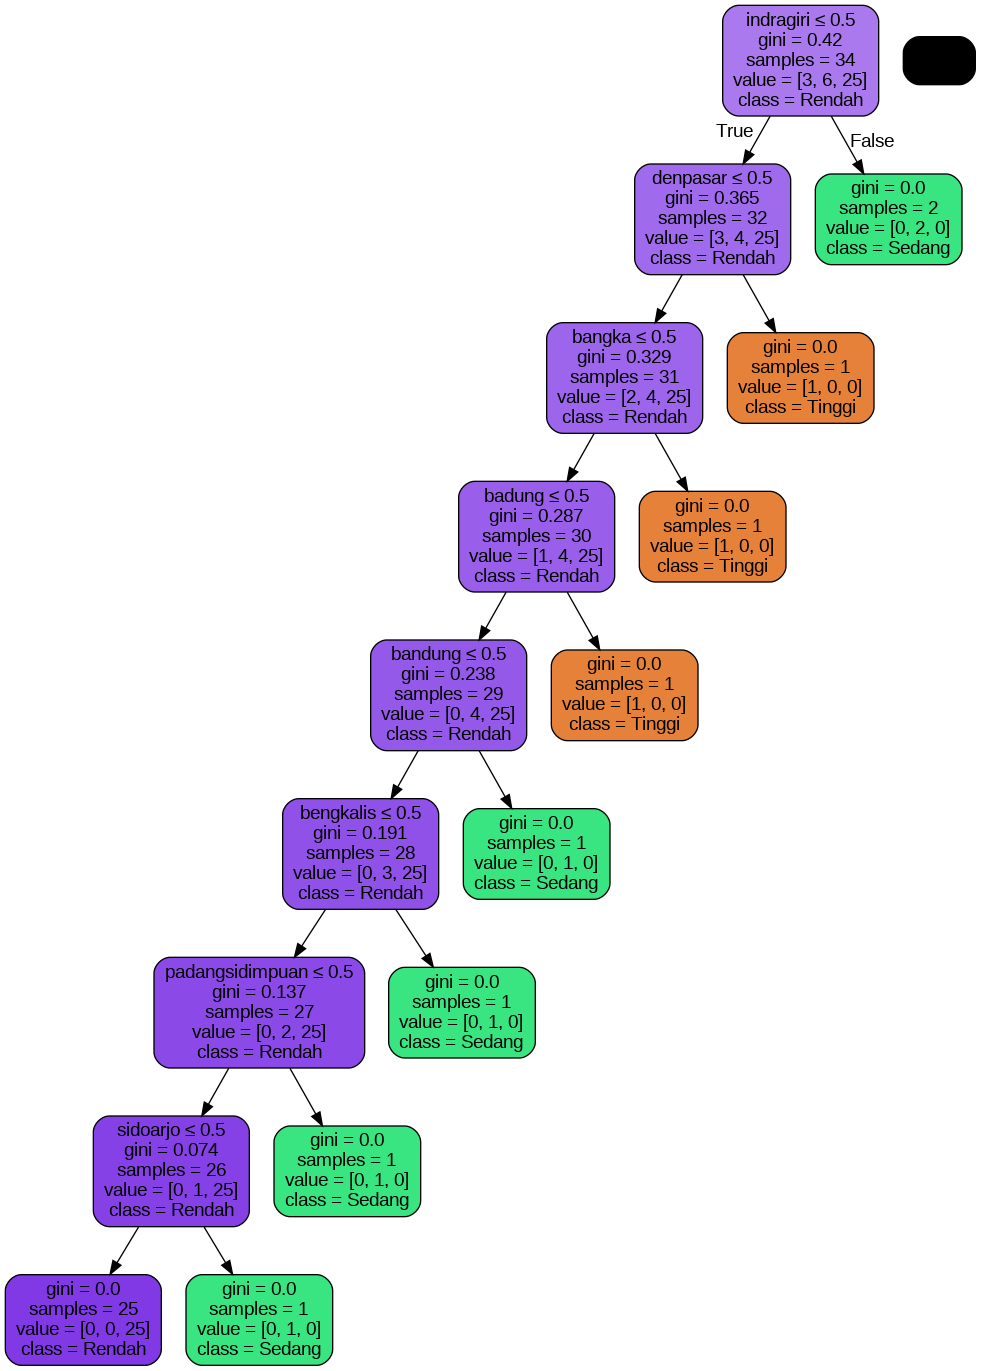

In [122]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

# Membuat dot data dari model DecisionTreeClassifier
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=vectorizer.get_feature_names_out(),
                class_names=['Tinggi', 'Sedang', 'Rendah'])  # Ganti dengan nama kelas Anda

# Membuat graph dari dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Memvisualisasikan graph
Image(graph.create_png())